## Здравствуйте, меня зовут *Николай Королев*, вот моё Задание №2 по курсу ПСАД-2020!

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from collections import defaultdict
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

np.random.seed(228)

%matplotlib inline
# %config InlineBackend.figure_format = 'svg' 

### Задача 1  

Задана выборка, включающая значения переменной $X$. 

X sample mean:  5.206


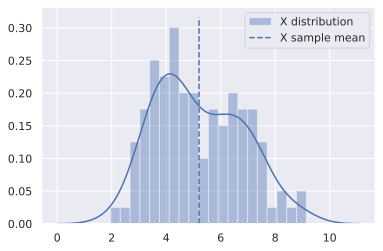

In [2]:
X = pd.read_excel('t1_data.xlsx').values.ravel()

sns.distplot(X, label='X distribution', bins=20)
plt.vlines(X.mean(), *plt.ylim(), linestyles='--', colors='b', label="X sample mean")
plt.legend()
print("X sample mean: ", np.round(X.mean(), 3))
plt.show()

Определите доверительный интервал для математического ожидания на уровне $\alpha$ (для каждого $\alpha$ из списка) c использованием...

In [3]:
alpha_list = np.array([0.1, 0.075, 0.05, 0.025, 0.01]) 

Распределения Стьюдента

In [4]:
def student_mci(data, alpha=0.05):
    sigma = np.std(data, ddof=1)
    inc = sp.stats.t(len(data) - 1).ppf(1 - alpha / 2) * sigma / np.sqrt(len(data))
    mean = np.mean(data)
    return mean - inc, mean + inc

Бутстрэп оценивания

In [5]:
def bootstrap_mci(data, alpha=0.05):
    n_samples = 10000
    mean = data.mean()
    boot = np.random.choice(data, replace=True, size=(n_samples, len(data))).mean(axis=1) - mean
    return mean - np.percentile(boot, (1 - alpha / 2) * 100), mean - np.percentile(boot, alpha / 2 * 100)

Сравните результаты и сделайте выводы.

In [6]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Student"] = [np.round(student_mci(X, alpha), 3) for alpha in alpha_list]
res["Bootstrap"] = [np.round(bootstrap_mci(X, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

**Выводы:** Результаты полученные при помощи t-теста Стьюдента и Bootstrap'а совпадают

### Задача 2

Два предприятия выпускают  изделия одного и того же назначения. Предприятие I выпускает изделия с математическим ожиданием срока службы $T_1$, предприятие II выпускает изделия с математическим ожиданием срока службы $T_2$. Сроки службы изделий обоих предприятий распределены нормально и стандартные отклонения для них равны $\sigma_1$ и $\sigma_2$ соответственно. При этом $T_1 < T_2$, но изделия второго предприятия дороже.

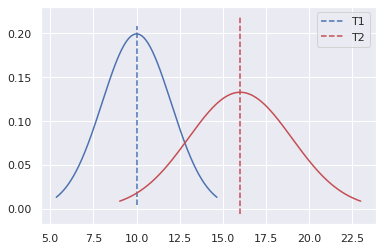

In [7]:
T1, T2, sigma1, sigma2 = 10, 16, 2, 3

def plot_T(T, sigma, c, label):
    norm = sp.stats.norm(loc=T, scale=sigma)
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
    plt.plot(x, norm.pdf(x), c=c)
    plt.vlines(T, *plt.ylim(), linestyles='--', colors=c, label=label)
    
plot_T(T1, sigma1, 'b', 'T1')
plot_T(T2, sigma2, 'r', 'T2')
plt.legend()
plt.show()

Третье предприятие утверждает, что ему удалось разработать технологию производства изделий со средним сроком службы  предприятия II, но по цене предприятия I. В качестве доказательства предлагаются результаты тестирования для $k$ изделий. 

Нулевая гипотеза $H_0$ предполагает, что на самом деле срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия I. Альтернативная гипотеза $H_1$ предполагает, что срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия II. Проверка этих двух предположений производится путем сравнения эмпирически оцененного среднего срока службы протестированных изделий предприятия III с некоторым порогом $T$. Конкретное значение $T$ находится из условия того, что допустимая ошибка первого рода равна $\alpha$. Значение ошибки второго рода обозначим через $\beta = \beta(\alpha, k)$.

Постройте график мощности такого теста в зависимости от $k$ и сделайте выводы.

In [8]:
# Your code goes here...

**Выводы:**

### Задача 3

В 5 серии 13 сезона передачи “Разрушители легенд” проверялась справедливость выражения “know something like the back of one’s hand”. В эксперименте принимало участие 12 испытуемых. Каждому из них были предъявлены 10 фотографий похожих рук разных людей, среди которых они должны были угадать свою.
11 из 12 испытуемых выбрали свою фотографию.
\($H_0$\): испытуемые выбирают фотографии тыльной стороны руки наугад (\($p$=0.1\)).
\($H_1$\): испытуемые выбирают фотографию тыльной стороны своей собственной руки осознанно (\($p>0.1$\)).


Воспользуйтесь точным биномиальным критерием для проверки (H_0) против альтернативы (H_1). Для этого:

	• Постройте нулевое распределение статистики числа успехов в выборке распределения Бернулли с параметром p. Сформируйте выборку сами напрямую из условия задачи.
	• Напишите функцию, которая принимала бы на вход тройку чисел (np,nq,p0), где np – число успехов, nq – число неудач в выборке размера np + nq, p0 – значение параметра p, задающего нулевую гипотезу. Ваша функция должна возвращать значение достигаемого уровня значимости против правосторонней альтернативы.
	• Визуально сравните поведение значения, выдаваемые вашей функцией со стандартным тестом
    scipy.stats.binom_test(·)
	• Отвергается ли гипотеза (H_0) на достигаемом уровне значимости 0.05? p-value?

**Выводы:**

### Задача 4

24 умственно отсталых ребёнка с СДВГ в течение недели принимали либо метилфенидат, либо плацебо, а в конце недели проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, после недельного курса каждый испытуемые проходили второй тест.
Каков эффект препарата?

In [9]:
adhd = pd.read_csv("ADHD.txt", sep=' ')
adhd.sample(5)

,D0,D60
8,34,45
0,57,62
22,33,45
12,26,36
20,34,35


Чтобы использовать $t$-критерий Стьюдента для связанных выборок, необходимо проверить, нет ли существенных отклонений от нормальности попарных разностей. Для этого воспользуйтесь визуальной проверкой нормальности (функция `qqplot` из `statsmodels`), a также библиотечным тестом проверки нормальности: `scipy.stats.shapiro`

In [10]:
# Your Code Here

Примените $t$-критерий Стьюдента `scipy.stats.ttest_rel` для связанных выборок.

In [11]:
# Your Code Here

Если бы у нас не было информации о связях между выборками, пришлось бы применять версию критерия Стьюдента для независимых выборок `scipy.stats.ttest_ind`. Сравните результаты применения критерия Стьюдента к этим данным, если считать выборки связанными и не связанными. В какои из этих случаев уровень достигаемой значимости меньше? Как вы думаете почему?

In [12]:
# Your Code Here

**Выводы:**

### Задача 5

Задана выборка $Y$ результатов распознавания для некоторой задачи классификации.

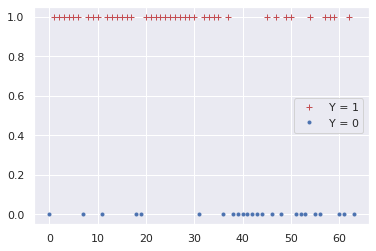

In [13]:
Y = pd.read_excel("t2_data.xlsx").values.ravel()

plt.plot(np.arange(Y.size)[Y == 1], np.count_nonzero(Y == 1) * [1], 'r+', label='Y = 1')
plt.plot(np.arange(Y.size)[Y == 0], np.count_nonzero(Y == 0) * [0], 'b.', label='Y = 0')
plt.legend()
plt.show()

Оцените доверительный интервал для показателя *ACCURACY* с использованием...

Метода Клоппера-Пирсона (с использованием аппроксимации через __бета__ распределение).

    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials

In [14]:
def bin_clopper_pearson(data, alpha=0.05):
    # Your code goes here
    pass

А также с помощью __нормальной__ аппроксимации

In [15]:
def bin_normal_approx(data, alpha=0.05):
    # Your code goes here
    pass

Сравните результаты и сделайте выводы.

In [16]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Clopper-Pearson"] = [np.round(bin_clopper_pearson(Y, alpha), 3) for alpha in alpha_list]
res["Normal"] = [np.round(bin_normal_approx(Y, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

Также сравните ваши реализованные метод с библиотечными: `statsmodels.stats.proportion.proportion_confint`, в вариантах  `proportion_confint(k, n, alpha, 'beta')` и `proportion_confint(k, n, alpha, 'normal')`

**Выводы:**